<a href="https://colab.research.google.com/github/NicolePessoa/Projeto-ML-/blob/main/Prompt_%2B_Image_to_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação de Dependências

>**Stable Diffusion** é uma técnica de deep learning que converte texto para imagem lançado em 2022. Ele é usado principalmente para gerar imagens detalhadas condicionadas a descrições de texto, embora também possa ser aplicado a outras tarefas, como pintura interna, pintura externa e geração de imagem para -traduções de imagens guiadas por um texto.



In [2]:
!pip install diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 13.5 MB/s eta 0:00:00


In [3]:
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("timbrooks/instruct-pix2pix")
pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionInstructPix2PixPipeline {
  "_class_name": "StableDiffusionInstructPix2PixPipeline",
  "_diffusers_version": "0.25.1",
  "_name_or_path": "timbrooks/instruct-pix2pix",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

--2024-01-22 19:32:53--  https://pretailustra.com/wp-content/uploads/2023/02/FWMmDUWXkAABtNf-1024x1024.jpg
Resolving pretailustra.com (pretailustra.com)... 45.132.157.228, 2a02:4780:13:913:0:1dad:37b5:1
Connecting to pretailustra.com (pretailustra.com)|45.132.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158512 (155K) [image/jpeg]
Saving to: ‘FWMmDUWXkAABtNf-1024x1024.jpg’

FWMmDUWXkAABtNf-102 100%[===================>] 154.80K   281KB/s    in 0.6s    

2024-01-22 19:32:55 (281 KB/s) - ‘FWMmDUWXkAABtNf-1024x1024.jpg’ saved [158512/158512]



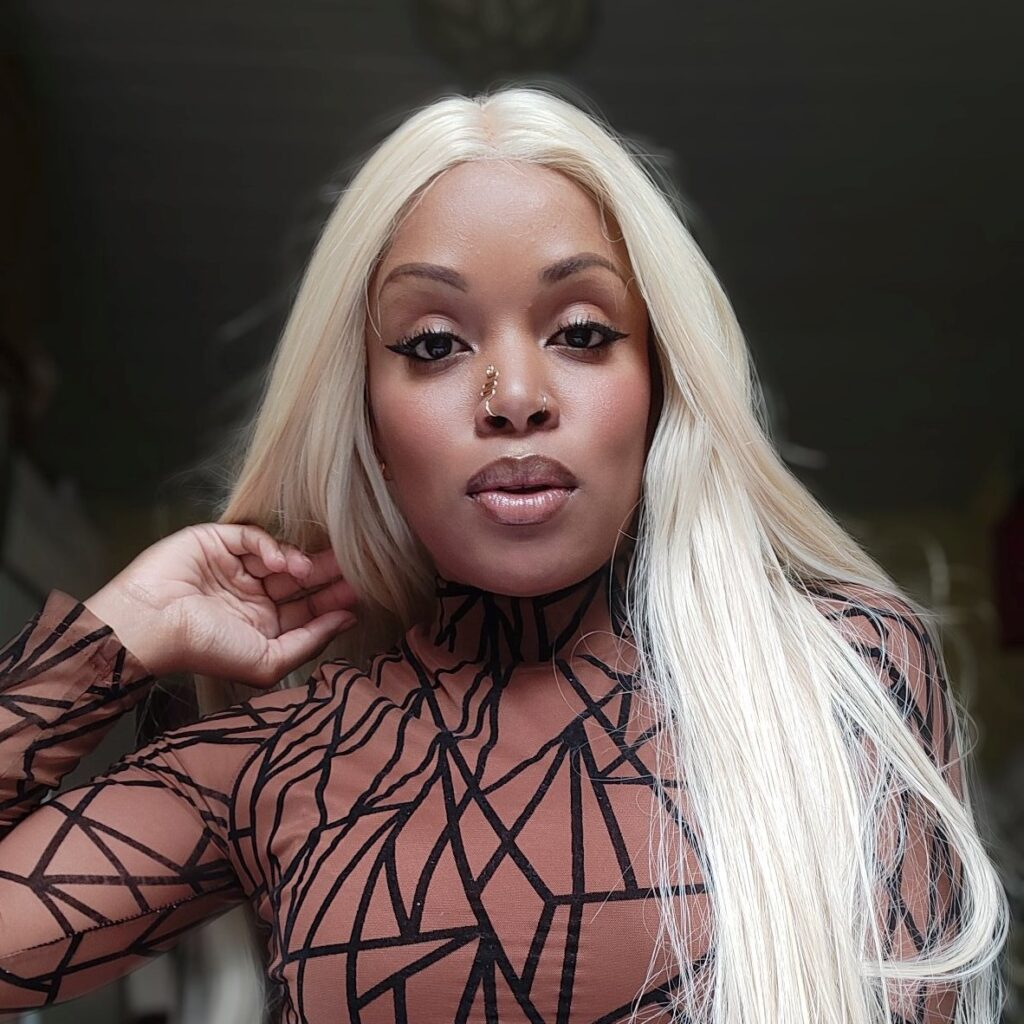

In [4]:
!wget https://pretailustra.com/wp-content/uploads/2023/02/FWMmDUWXkAABtNf-1024x1024.jpg

from PIL import Image
image = Image.open("FWMmDUWXkAABtNf-1024x1024.jpg")
image

  0%|          | 0/20 [00:00<?, ?it/s]

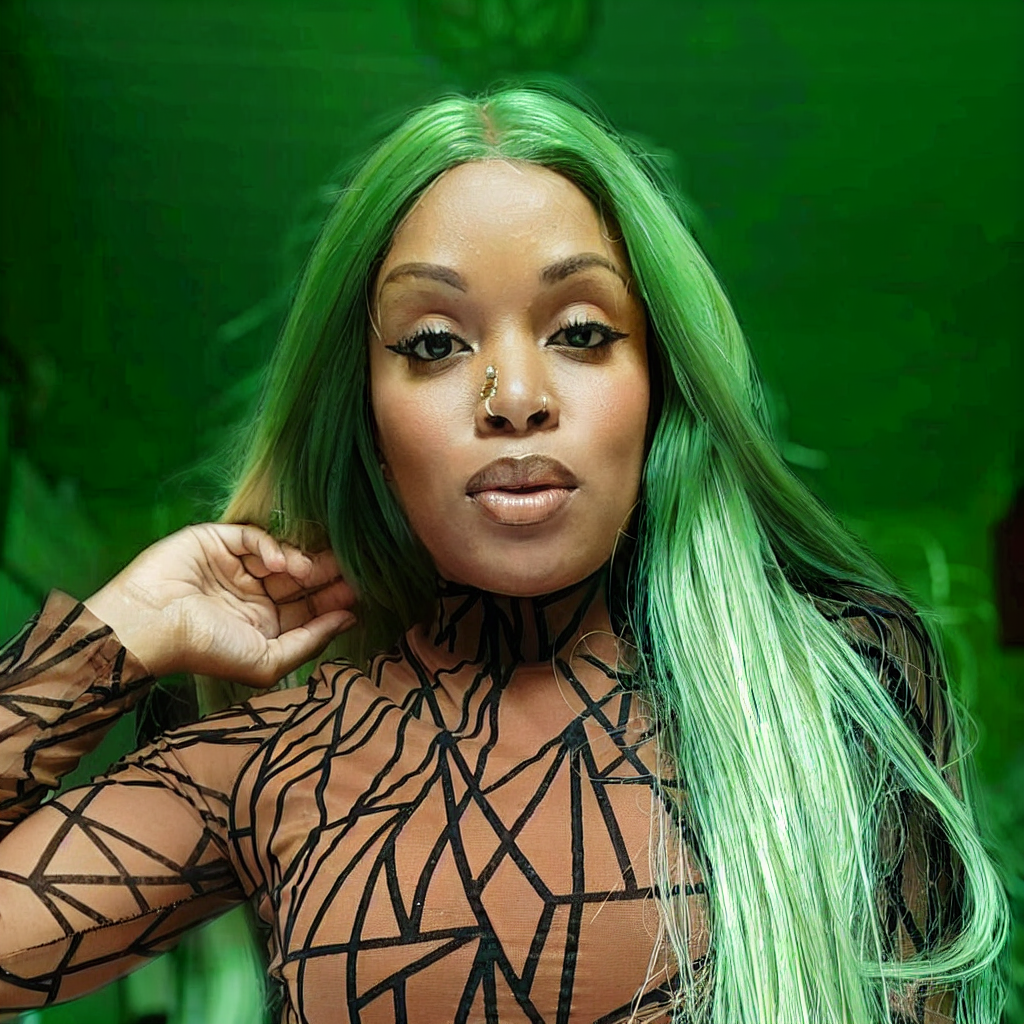

In [17]:
#image = image.convert("RGB")
prompt = "pinte cabelo dela de verde"
images = pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1.5).images[0]
images